This file is for demo only.

We can read the `progress.csv` and plot the learning curve:

In [26]:
!pip install gymnasium
!pip install mediapy
!pip install pygame
!pip install git+https://github.com/metadriverse/metadrive

  Cloning https://github.com/metadriverse/metadrive to /private/var/folders/1j/xx2fzlfj1vjb2lzk69wk79zm0000gn/T/pip-req-build-ysu5a3ks
  Running command git clone --filter=blob:none --quiet https://github.com/metadriverse/metadrive /private/var/folders/1j/xx2fzlfj1vjb2lzk69wk79zm0000gn/T/pip-req-build-ysu5a3ks
  Resolved https://github.com/metadriverse/metadrive to commit b8a66c92ac34a5f80944b41600fed08d8e3a90ee
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 8.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 14.4 MB/s eta 0:00:0000:0100:01
  Using cached progressbar-2.5-py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 MB 6.8 MB/s eta 0:00:0000:0100:01
  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/a1/f6/57de91ea40c670527cd47a6548bf2cbedc68cec57c041793b256356abad7/opencv_python-4.8.1.78-cp37-abi3-macosx_11_0_arm64.whl.met

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/3e/cf/ede993ed7070c5487e6db550aad490178c06eaa48ad26ff5e5263f995fba/geopandas-0.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for shapely from https://files.pythonhosted.org/packages/2c/b1/ca09649b4abe06366d41e90c3eee95a7741657404404a63bd0e8b53e32b8/shapely-2.0.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/62/50/cc0cbc48d4f11899611edfb23a99d9d43101d3d28f2ef90a5506782cae84/fiona-1.9.5-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.8 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/30/bd/b9bd3761f08754e8dbb34c5a647db2099b348ab5da338e90980caf280e37/pyproj-3.6.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.7

Keys in the data: Index(['index', 'Unnamed: 0', 'log_dir', 'frame_per_second', 'policy_loss',
       'entropy', 'value_loss', 'total_loss', 'grad_norm', 'adv_mean', 'ratio',
       'total_steps', 'total_episodes', 'iteration', 'total_time',
       'crash_sidewalk_rate', 'crash_vehicle_rate', 'idle_rate', 'speed_km_h',
       'max_step_rate', 'success_rate', 'episode_reward', 'episode_length',
       'label'],
      dtype='object')


,speed_km_h,success_rate,idle_rate,crash_sidewalk_rate
label,,,,
v1,70.708456,0.980142,0.000014,0.013453
v1-5,65.318568,0.917445,0.000041,0.029373
v2,72.520644,0.945824,0.000055,0.010597
v2-multi2,70.923649,0.964549,0.000029,0.020196


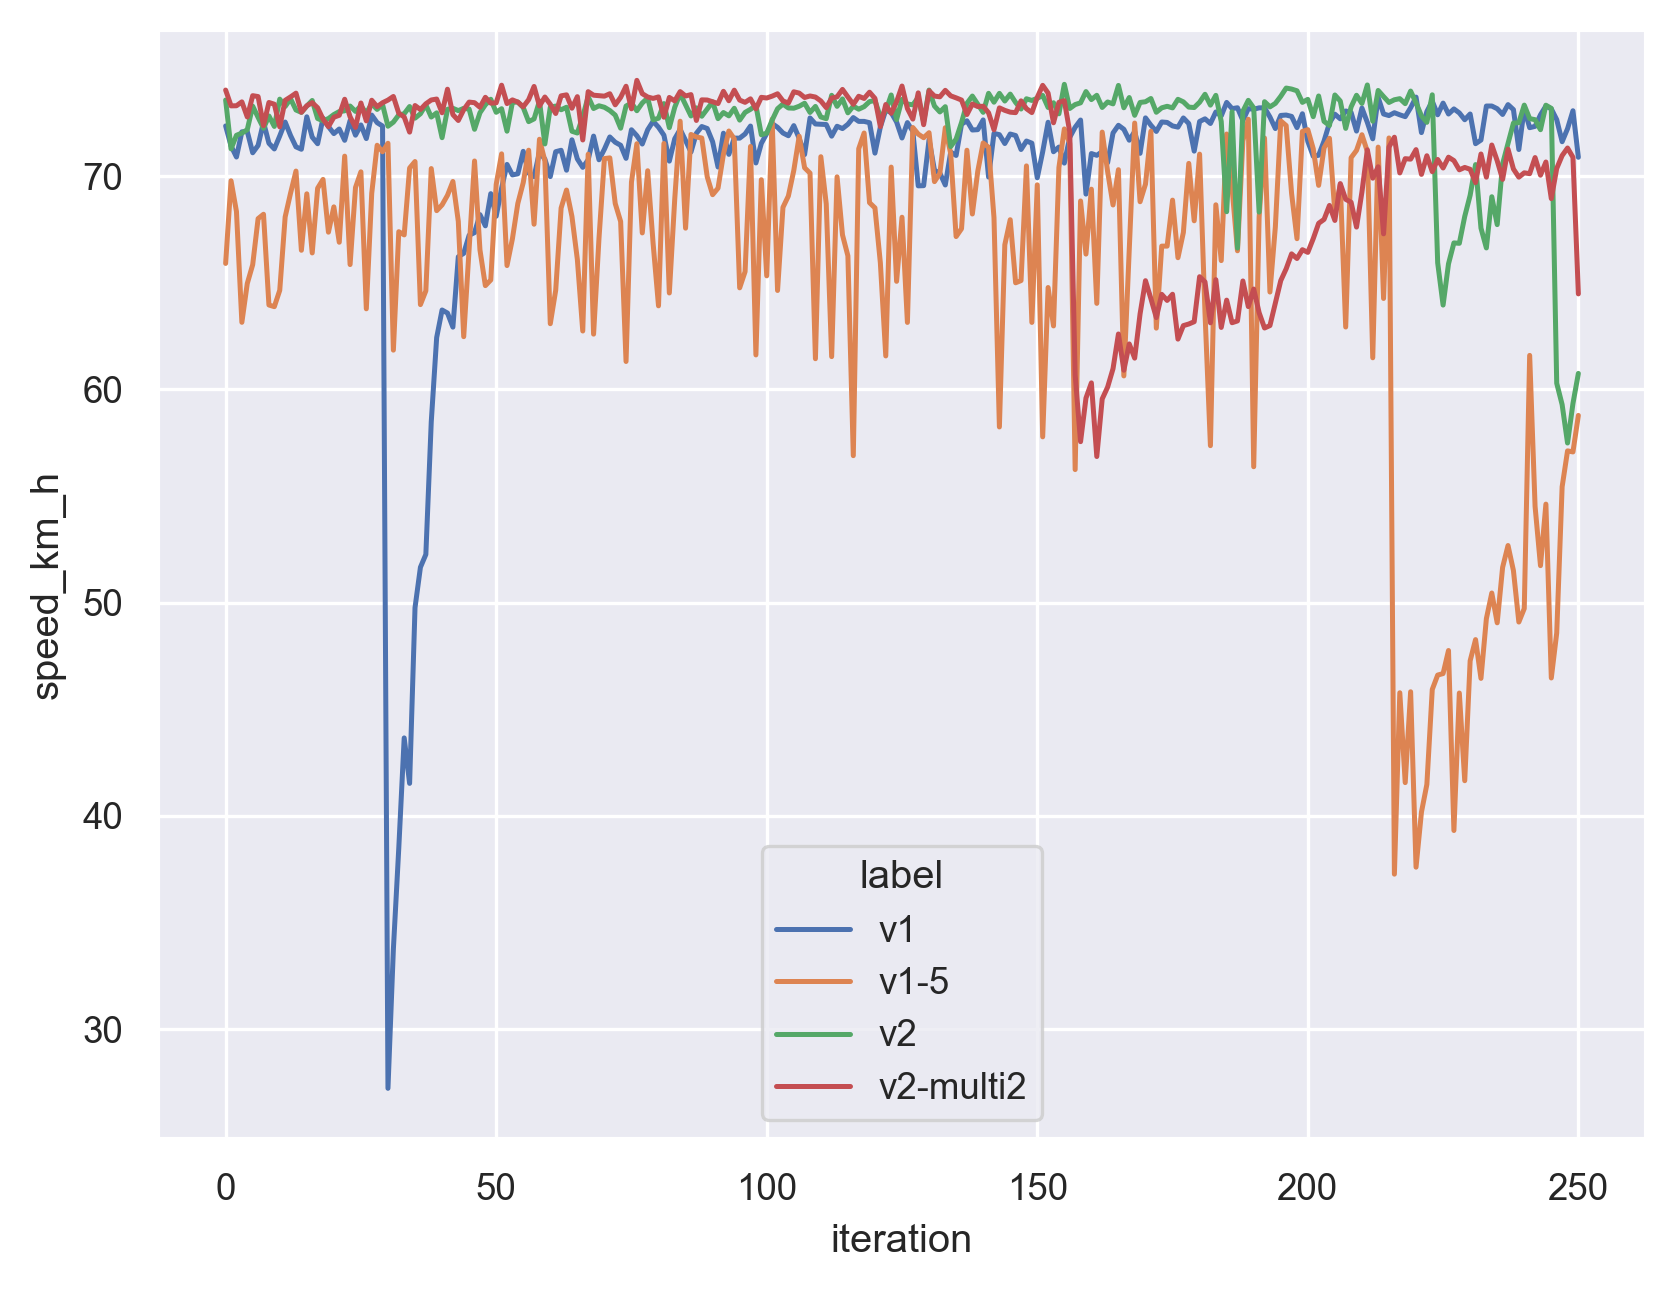

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dfs = []

# progress = pd.read_csv("data/train_ppo_in_single_agent_env/ppo/progress.csv")
# progress["label"] = "single-default"
# dfs.append(progress)

# progress = pd.read_csv("data/ppo_agent_single_v3/ppo/progress.csv")
# progress["label"] = "v3"
# dfs.append(progress)

# progress = pd.read_csv("data/ppo_agent_single_v4/ppo/progress.csv")
# progress["label"] = "v4"
# dfs.append(progress)

progress = pd.read_csv("data/ppo_agent_enhanced/ppo/progress.csv")
progress["label"] = "v1"
dfs.append(progress)

progress = pd.read_csv("data/ppo_agent_enhanced_v1-5/ppo/progress.csv")
progress["label"] = "v1-5"
dfs.append(progress)

progress = pd.read_csv("data/ppo_agent_enhanced_v2/ppo/progress.csv")
progress["label"] = "v2"
dfs.append(progress)

progress = pd.read_csv("data/ppo_agent_enhanced_v2_multi-2/ppo/progress.csv")
progress["label"] = "v2-multi2"
dfs.append(progress)

dataframe = pd.concat(dfs).reset_index()

print("Keys in the data:", dataframe.keys())

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=dataframe,
    x="iteration",
    y="speed_km_h",  # <<< Change this to arbitrary key in the data
    hue="label"
)

select = ["speed_km_h", "success_rate", "idle_rate", "crash_sidewalk_rate"]
dataframe.loc[dataframe['iteration'] <= 120]
dataframe.groupby("label")[select].mean()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


dfs = []

# progress = pd.read_csv("data/train_ppo_in_single_agent_env/ppo/progress.csv")
# progress["label"] = "single-default"
# dfs.append(progress)

progress = pd.read_csv("data/train_ppo_in_multiagent_env/ppo/progress.csv")
progress["label"] = "multi-default"
dfs.append(progress)

progress = pd.read_csv("data/ppo_agent_v2_enhanced/ppo/progress.csv")
progress["label"] = "enhanced"
dfs.append(progress)

# enhanced2 -> 220
progress = pd.read_csv("data/ppo_agent_enhanced2/ppo/progress.csv")
progress["label"] = "enhanced2"
dfs.append(progress)

progress = pd.read_csv("data/ppo_agent_enhanced_v2_multi/ppo/progress.csv")
progress["label"] = "enhanced2_multi"
dfs.append(progress)

# progress = pd.read_csv("data/ppo_agent_multi_v3/ppo/progress.csv")
# progress["label"] = "v3"
# dfs.append(progress)

# progress = pd.read_csv("data/ppo_agent_multi_v4/ppo/progress.csv")
# progress["label"] = "v5"
# dfs.append(progress)

# progress = pd.read_csv("data/ppo_agent_multi_v6/ppo/progress.csv")
# progress["label"] = "v6"
# dfs.append(progress)

# progress = pd.read_csv("data/ppo_agent_multi_v7/ppo/progress.csv")
# progress["label"] = "v7"
# dfs.append(progress)

# progress = pd.read_csv("data/ppo_agent_multi_v8/ppo/progress.csv")
# progress["label"] = "v8"
# dfs.append(progress)

# progress = pd.read_csv("data/ppo_agent_multi_v8/ppo/progress.csv")
# progress["label"] = "v9"
# dfs.append(progress)

# progress = pd.read_csv("train_ppo_in_single_agent_env_crashpen2_bugfixed/ppo/progress.csv")
# progress["label"] = "default crash_penalty=2"
# dfs.append(progress)

# progress = pd.read_csv("train_ppo_in_single_agent_env_crashpen5_bugfixed/ppo/progress.csv")
# progress["label"] = "default crash_penalty=5"
# dfs.append(progress)

# progress = pd.read_csv("train_ppo_in_single_agent_env_crashpen20_sucrew100/ppo/progress.csv")
# progress["label"] = "default crash_penalty=20 success_reward=100"
# dfs.append(progress)

# progress = pd.read_csv("train_ppo_in_single_agent_env_crashpen20_sucrew100_speedrew0/ppo/progress.csv")
# progress["label"] = "default crash_penalty=20 success_reward=100 speed_reward=0"
# dfs.append(progress)

dataframe = pd.concat(dfs).reset_index()

print("Keys in the data:", dataframe.keys())

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=dataframe,
    x="total_steps",
    y="episode_reward",  # <<< Change this to arbitrary key in the data
    hue="label"
)

select = ["speed_km_h", "success_rate", "idle_rate", "crash_sidewalk_rate"]
#dataframe.loc[dataframe['total_steps'] <= 0.8e7]
dataframe.groupby("label")[select].mean()

#plt.xlim(10, 100)


FileNotFoundError: [Errno 2] No such file or directory: 'data/ppo_agent_v2_enhanced/ppo/progress.csv'

v15_progress_reward Unnamed: 0     lr  explore_noise  batch_size  discount   tau  policy_noise  noise_clip  policy_freq  crash_penalty  success_reward  speed_reward
          0 0.0001            0.3         256      0.99 0.005           0.2         0.5            2             50             100             0

v16_progress_reward Unnamed: 0     lr  explore_noise  batch_size  discount   tau  policy_noise  noise_clip  policy_freq  crash_penalty  success_reward  speed_reward  progress_mulitplier
          0 0.0001            0.3         256      0.99 0.005           0.2         0.5            2             50             100             0                   50

v17_progress_reward Unnamed: 0     lr  explore_noise  batch_size  discount   tau  policy_noise  noise_clip  policy_freq  crash_penalty  success_reward  speed_reward  progress_mulitplier
          0 0.0005            0.3         256      0.99 0.005           0.2         0.5            2             50             100             0   

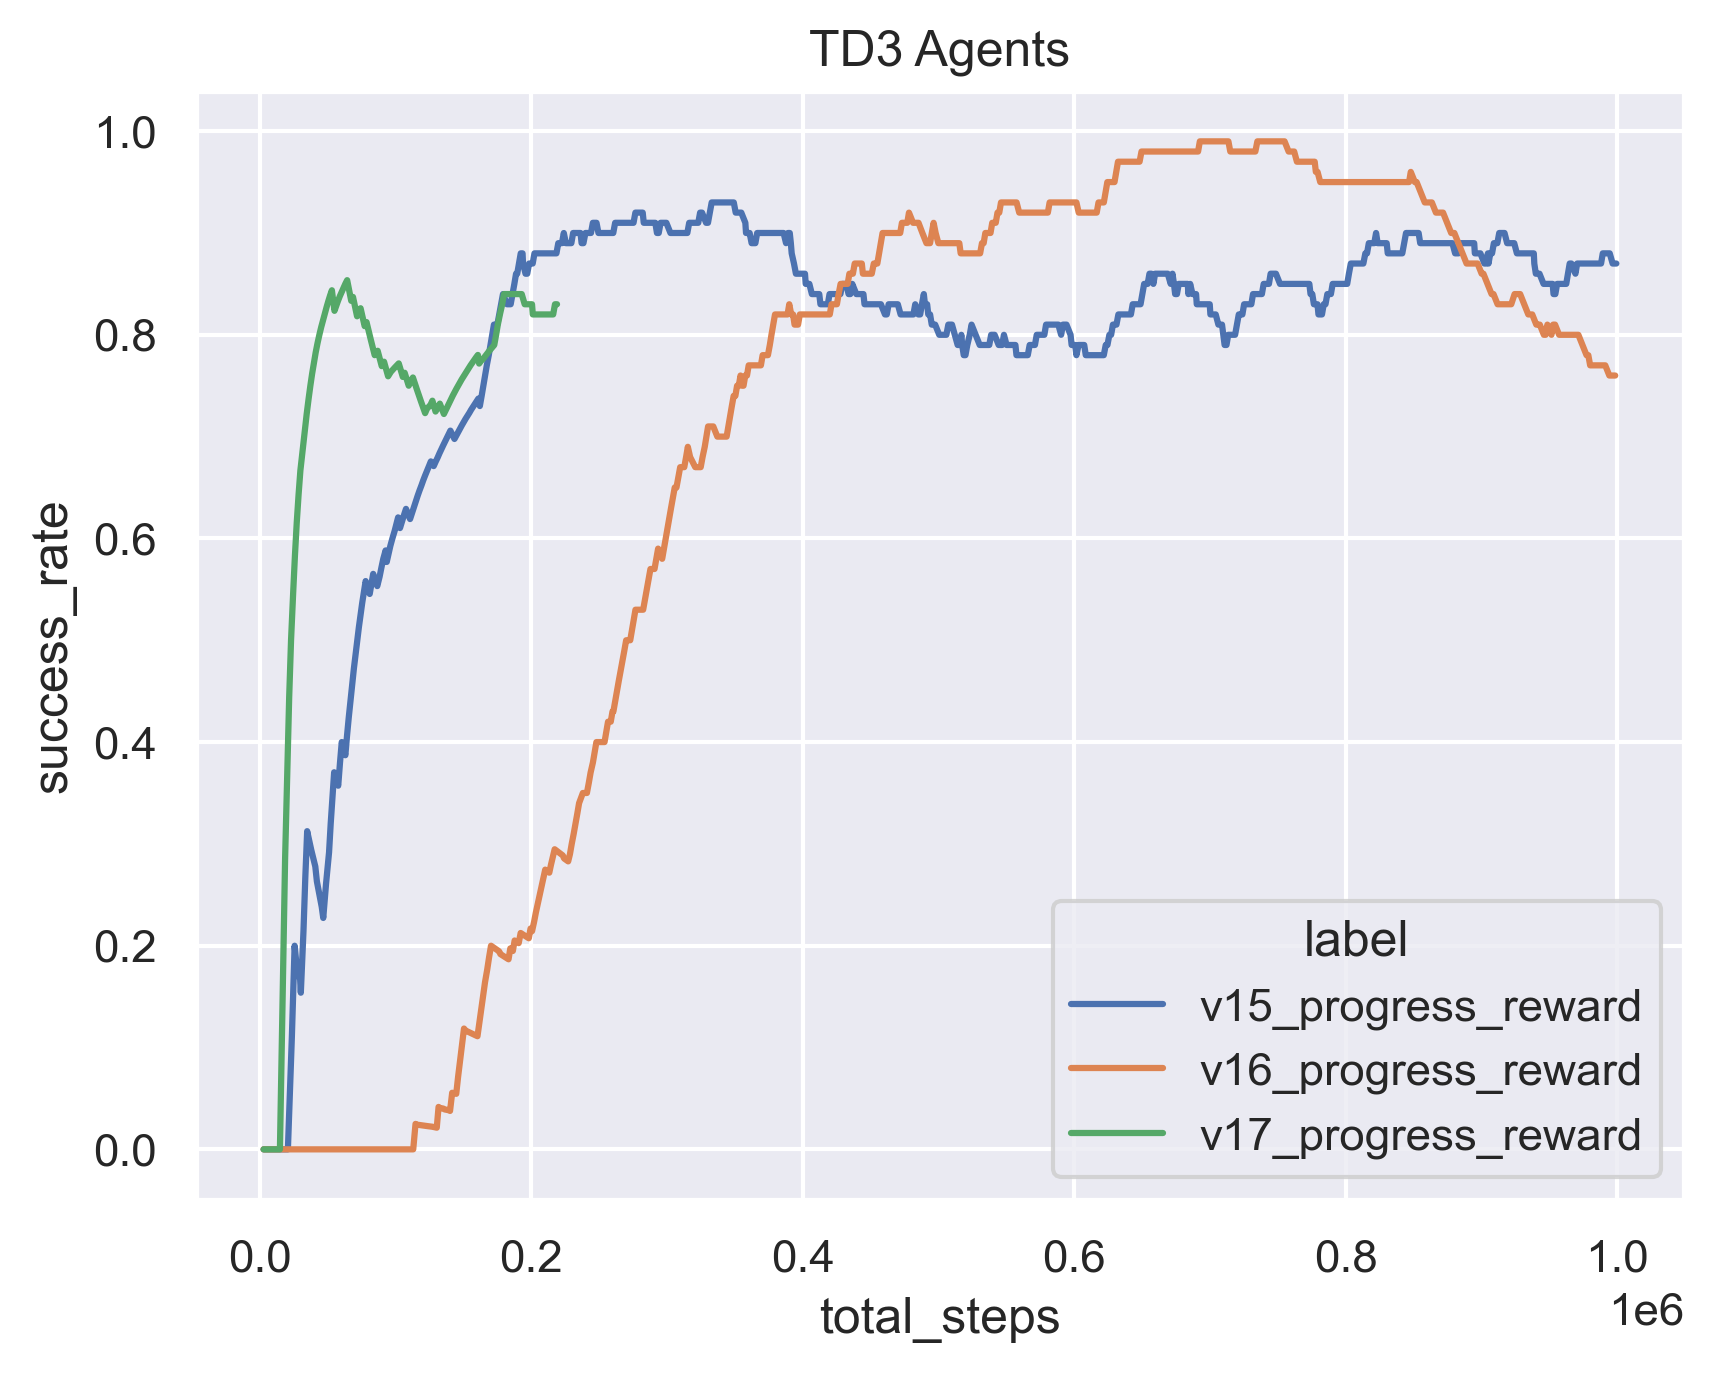

In [209]:
def output_hyperparams(path, label):
    hp = pd.read_csv(path + "/hyperparams.csv")
    print(label + hp.to_string(index=False, index_names=False) + "\n")

dfs = []

# progress = pd.read_csv("data/td3_agent_single/td3/progress.csv")
# progress["label"] = "default"
# dfs.append(progress)

# # progress = pd.read_csv("data/td3_agent_single_decreased_lr/td3/progress.csv")
# # progress["label"] = "default_decreased_lr"
# # dfs.append(progress)

# # progress = pd.read_csv("data/td3_agent_single_overhaul/td3/progress.csv")
# # progress["label"] = "overhaul"
# # dfs.append(progress)

# # label ="v4"
# # path = "data/td3_agent_single_{}/td3".format(label)
# # progress = pd.read_csv(path + "/progress.csv")
# # progress["label"] = label
# # dfs.append(progress)
# # output_hyperparams(path, label)

# # label ="v5"
# # path = "data/td3_agent_single_{}/td3".format(label)
# # progress = pd.read_csv(path + "/progress.csv")
# # progress["label"] = label
# # dfs.append(progress)
# # output_hyperparams(path, label)

# label ="v6"
# path = "data/td3_agent_single_{}/td3".format(label)
# progress = pd.read_csv(path + "/progress.csv")
# progress["label"] = label
# dfs.append(progress)
# output_hyperparams(path, label)

# # NOTES: Higher explore_noise -> gets stuck
# # label ="v7"
# # path = "data/td3_agent_single_{}/td3".format(label)
# # progress = pd.read_csv(path + "/progress.csv")
# # progress["label"] = label
# # dfs.append(progress)
# # output_hyperparams(path, label)

# label ="v8"
# path = "data/td3_agent_single_{}/td3".format(label)
# progress = pd.read_csv(path + "/progress.csv")
# progress["label"] = label
# dfs.append(progress)
# output_hyperparams(path, label)

# label ="v9"
# path = "data/td3_agent_single_{}/td3".format(label)
# progress = pd.read_csv(path + "/progress.csv")
# progress["label"] = label
# dfs.append(progress)
# output_hyperparams(path, label)

# label ="v10"
# path = "data/td3_agent_single_{}/td3".format(label)
# progress = pd.read_csv(path + "/progress.csv")
# progress["label"] = label
# dfs.append(progress)
# output_hyperparams(path, label)

# label ="v13"
# path = "data/td3_agent_single_{}/td3".format(label)
# progress = pd.read_csv(path + "/progress.csv")
# progress["label"] = label
# dfs.append(progress)
# output_hyperparams(path, label)

# # INCREASED MAX STEPS TO 1e7
# label ="v12"
# path = "data/td3_agent_single_{}/td3".format(label)
# progress = pd.read_csv(path + "/progress.csv")
# progress["label"] = label
# dfs.append(progress)
# output_hyperparams(path, label)

# ARRIVED DESTINATION!!
label ="v15_progress_reward"
path = "data/td3_agent_single_{}/td3".format(label)
progress = pd.read_csv(path + "/progress.csv")
progress["label"] = label
dfs.append(progress)
output_hyperparams(path, label)

label ="v16_progress_reward"
path = "data/td3_agent_single_{}/td3".format(label)
progress = pd.read_csv(path + "/progress.csv")
progress["label"] = label
dfs.append(progress)
output_hyperparams(path, label)

label ="v17_progress_reward"
path = "data/td3_agent_single_{}/td3".format(label)
progress = pd.read_csv(path + "/progress.csv")
progress["label"] = label
dfs.append(progress)
output_hyperparams(path, label)

dataframe = pd.concat(dfs).reset_index()
print("The log contains these keys: ", dataframe.keys())

plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=dataframe,
    x="total_steps",
    y="success_rate",
    hue="label"
)
ax.set_title("TD3 Agents")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('td3.png', format='png', dpi=300, bbox_inches="tight")

Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']


/Users/cjpark/anaconda3/lib/python3.11/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment MetaDrive-Tut-Easy-v0 already in registry.
  registry[new_spec.id] = new_spec
/Users/cjpark/anaconda3/lib/python3.11/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment MetaDrive-Tut-Hard-v0 already in registry.
  registry[new_spec.id] = new_spec
/Users/cjpark/anaconda3/lib/python3.11/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment MetaDrive-Tut-1Env-v0 already in registry.
  registry[new_spec.id] = new_spec
/Users/cjpark/anaconda3/lib/python3.11/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment MetaDrive-Tut-5Env-v0 already in registry.
  registry[new_spec.id] = new_spec
/Users/cjpark/anaconda3/lib/python3.11/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment MetaDrive-Tut-10Env-v0 already in

KeyError: "'{'environment_num'}' does not exist in existing config. Please use config.update(...) to update the config. Existing keys: dict_keys(['random_agent_model', 'target_vehicle_configs', 'num_agents', 'is_multi_agent', 'allow_respawn', 'delay_done', 'agent_policy', 'manual_control', 'controller', 'discrete_action', 'use_multi_discrete', 'discrete_steering_dim', 'discrete_throttle_dim', 'action_check', 'norm_pixel', 'stack_size', 'image_observation', 'agent_observation', 'horizon', 'truncate_as_terminate', 'use_chase_camera_follow_lane', 'camera_height', 'camera_dist', 'camera_pitch', 'camera_smooth', 'camera_smooth_buffer_size', 'camera_fov', 'prefer_track_agent', 'top_down_camera_initial_x', 'top_down_camera_initial_y', 'top_down_camera_initial_z', 'vehicle_config', 'sensors', 'use_render', 'window_size', 'auto_resize_window', 'physics_world_step_size', 'decision_repeat', 'image_on_cuda', '_render_mode', 'force_render_fps', 'force_destroy', 'num_buffering_objects', 'render_pipeline', 'daytime', 'shadow_range', 'multi_thread_render', 'multi_thread_render_mode', 'preload_models', 'disable_model_compression', 'map_region_size', 'cull_lanes_outside_map', 'drivable_area_extension', 'height_scale', 'use_mesh_terrain', 'full_size_mesh', 'show_crosswalk', 'show_sidewalk', 'build_lane_line_for_semantic_cam', 'pstats', 'debug', 'debug_panda3d', 'debug_physics_world', 'debug_static_world', 'log_level', 'show_coordinates', 'show_fps', 'show_logo', 'show_mouse', 'show_skybox', 'show_terrain', 'show_interface', 'show_policy_mark', 'show_interface_navi_mark', 'interface_panel', 'record_episode', 'replay_episode', 'only_reset_when_replay', 'force_reuse_object_name', 'start_seed', 'num_scenarios', 'map', 'block_dist_config', 'random_lane_width', 'random_lane_num', 'map_config', 'store_map', 'traffic_density', 'need_inverse_traffic', 'traffic_mode', 'random_traffic', 'traffic_vehicle_config', 'accident_prob', 'static_traffic_object', 'use_AI_protector', 'save_level', 'random_spawn_lane_index', 'success_reward', 'out_of_road_penalty', 'crash_vehicle_penalty', 'crash_object_penalty', 'driving_reward', 'speed_reward', 'use_lateral_reward', 'crash_vehicle_cost', 'crash_object_cost', 'out_of_road_cost', 'out_of_route_done', 'on_continuous_line_done', 'crash_vehicle_done', 'crash_object_done', 'crash_human_done'])."